In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from pandas_datareader import data as web
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def nhcfr(symbol, days_high=50, days_before=20, days_after=20):
    '''
    nhcfr(shortening for: new high close forward returns)
    this function generates two plots of daily returns (heat map of day to day)
    and bar chart of compounded return for evrey event.
    arguments: 
    days_high = the number of days to calculate 
    days_before = the number of days that the market didnt make new (days_high) before the event
    days_after = number of days to calculate the returns after the market made new high close (aka:days_high)
    
    '''
    start = pd.datetime(2010,1,1)
    end = pd.datetime.now()
    df = web.get_data_yahoo(symbol, start=start, end=end)[['Open','High','Low','Close']]
    df['return'] = np.log(df.Close / df.Close.shift(1))*100
    df['days_high_close'] = ((df.Close - df.Close.rolling(days_high).min()) /
                    (df.Close.rolling(days_high).max() - df.Close.rolling(days_high).min())).round(2)
    df['signal'] = np.where(df.Close > df.Close.rolling(days_high).max().shift(1),1,0) 
    df.index = df.index.strftime("%d/%m/%Y")
    df.dropna(inplace=True)
    results={}

    for i in range(days_high,len(df)-21):
        if (df.iloc[i,6] ==1) and (df.iloc[i-(days_high+1):i,6].sum()==0):
            results[df.index[i]]=list(df.iloc[i+1:i+(days_after+1),4])


    results_test = pd.DataFrame.from_dict(results).T
    results_test.columns = results_test.columns+1
    results_test.index =  pd.to_datetime(results_test.index).strftime('%d-%b-%Y')
    cumprodReturn = (((1+results_test/100).cumprod(axis=1)-1)*100)[days_after]
    cm = round(cumprodReturn.mean(),2)
    
    
    fig, ax = plt.subplots(figsize=(25,17));
    plt.title(f'{symbol.upper()} - Forward Returns in Perecentages',fontsize=30)
    sns.heatmap(results_test, cmap='RdYlGn',lw=0.5, fmt="", vmin=-2,vmax=2)
    plt.yticks(fontsize=20, rotation=0),plt.xticks(fontsize =20)
    plt.xlabel('Days Forward', fontsize=25)
    
    fig, ax = plt.subplots()
    textstr = f'Average Compounded Return ={cm}%' 
    props = dict(boxstyle='round', facecolor='grey', alpha=0.5)
    ax.text(0.07, 0.92, textstr, transform=ax.transAxes, fontsize=17, verticalalignment='top', bbox=props)
    cumprodReturn.plot(kind='bar',color = ['g' if i>0 else 'r' for i in cumprodReturn ], figsize=(17,6))
    plt.title(f'{symbol.upper()} - {days_after} Day Compounded Return after new {days_high} Days HighClose',fontsize=20)
    plt.ylabel('% Percent change', fontsize=15);


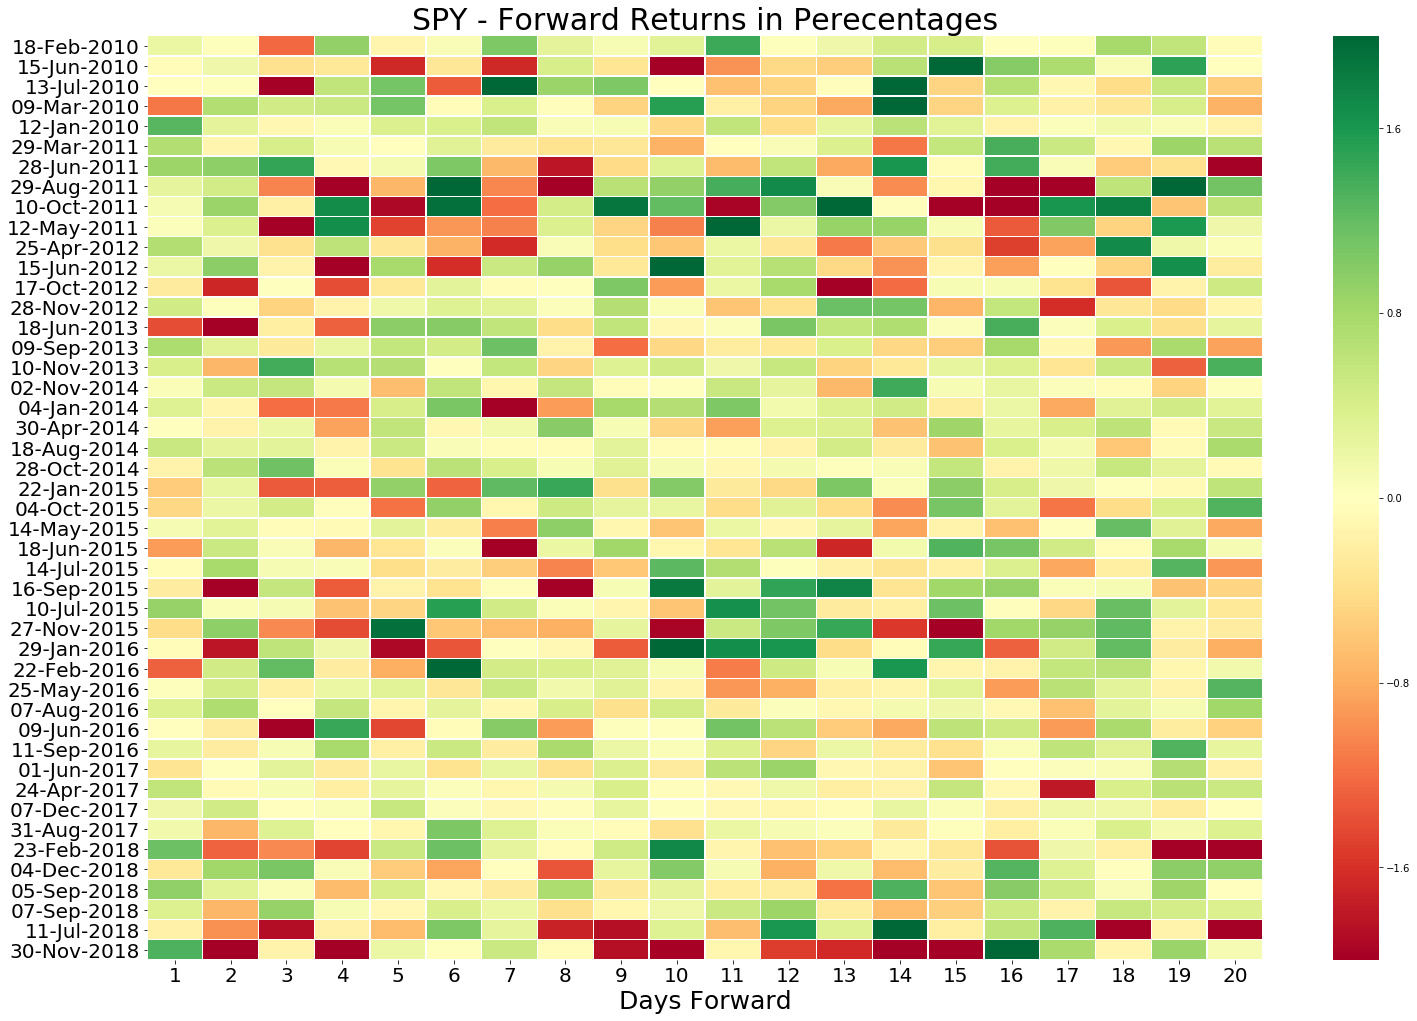

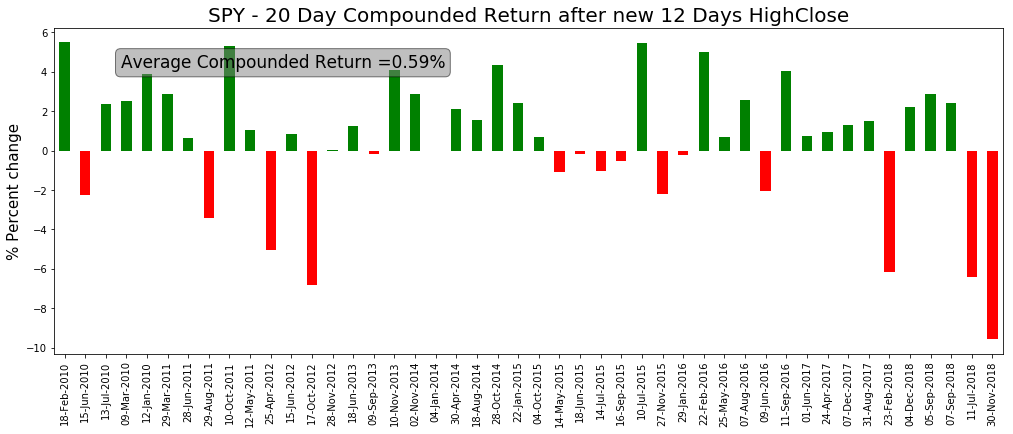

In [3]:
nhcfr('spy',12,20,20)

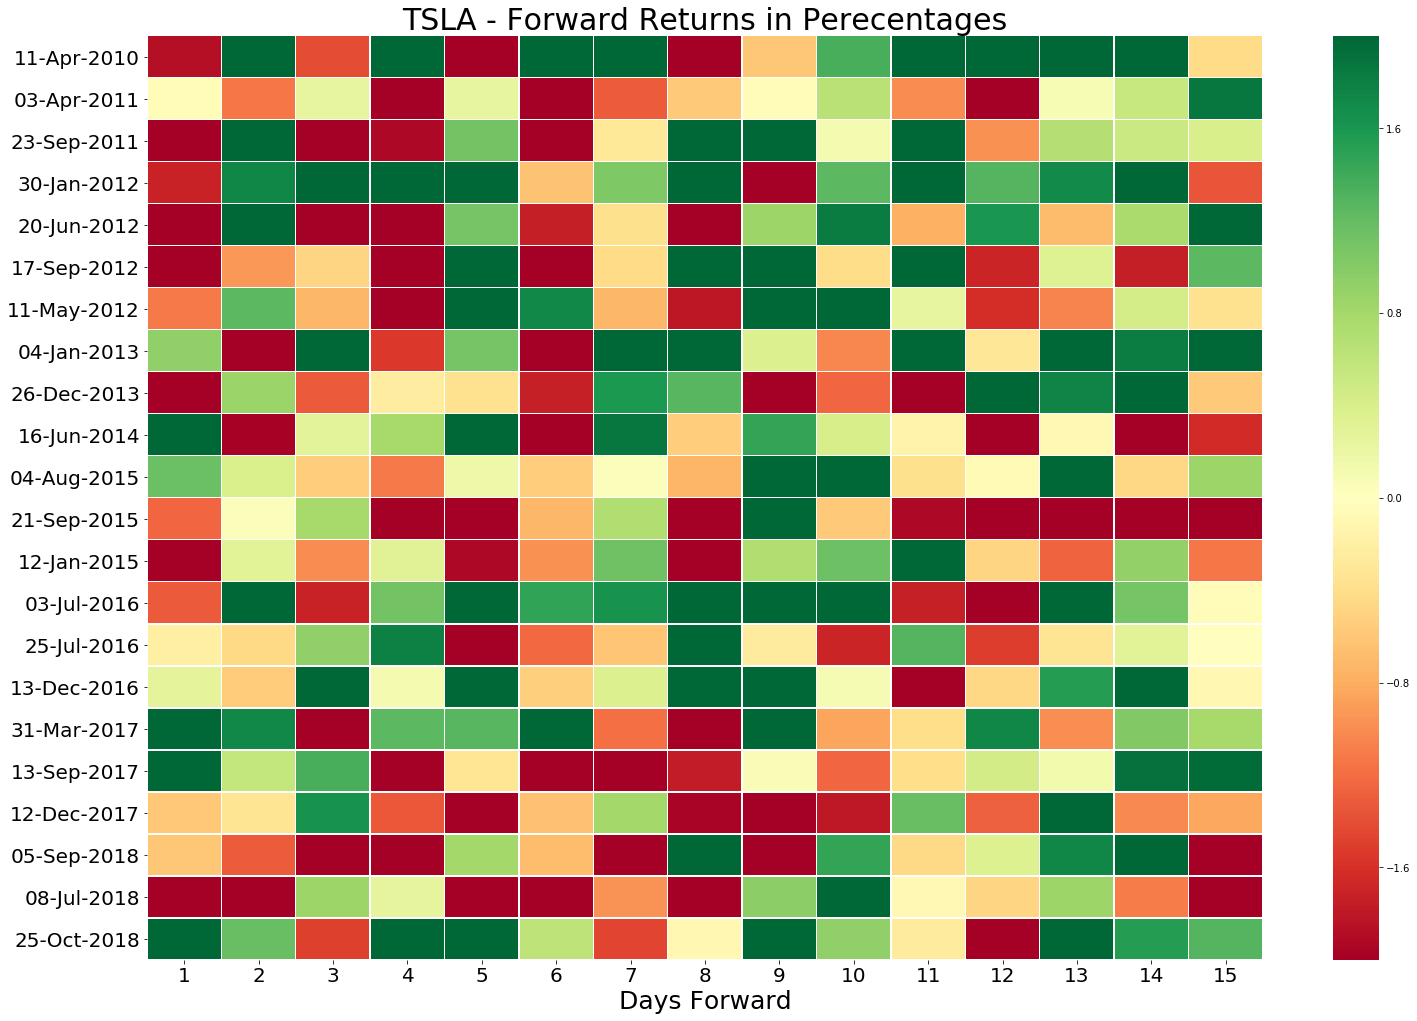

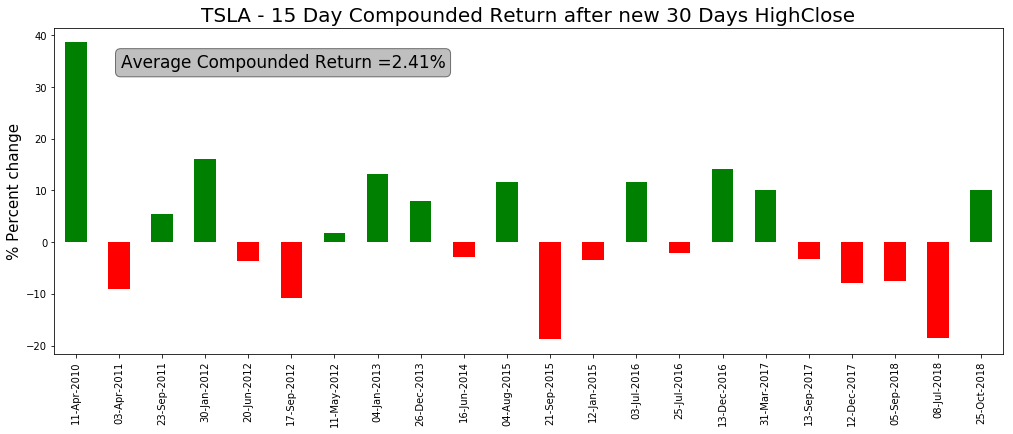

In [4]:
nhcfr('tsla',30,10,15)